## Demagnetising potential around a uniform prism source

We want to derive the (magnetic scalar) potential around a uniformly magnetised prism. Two good references, that get us much of the way, are the following papers containing the demagnetising _field_ around a uniform prism, and the _gravitational_ potential around a uniform prism mass.

### Field around a uniformly magnetised prism

The first appendix in [Smith _et al._](https://backend.orbit.dtu.dk/ws/portalfiles/portal/5090369/Smith.pdf) republishes in modern notation the formulae from [Joseph & Schlömann (1965)](https://sci-hub.yncjkj.com/10.1063/1.1703091), who are using material from an undigitised paper of Rhodes & Rowlands (1954; _Proc. Leeds Phil. Lit. Soc. Sci._ Sec. **6**, 191). Here the field (a vector, unlike the scalar potential) is a rotation and scaling of the magnetisation vector, facilitated by the 3x3 demagnetisation tensor:

<center><img src="assets/demag-tensor-eq.png" width="400" /></center>

Note how, by the conventions of definite integration, $\mathbb{N}$ for a prism with domain $[-a, a]\times[-b,b]\times[-c,c]$ must contain the signed sum of the indefinte integral evaluated at the $2^3$ different combinations of $(\pm a, \pm b, \pm c)$. Geometrically, this corresponds to starting with the region $(-\infty, a] \times (-\infty, b] \times (-\infty, c]$, then substracting off the three regions with one limit negated (i.e. $(-\infty, -a] \times (-\infty, b] \times (-\infty, c]$ and likewise for $b$ and $c$), adding back in the regions with _two_ limits negated, and finally subtracting off the final octant $(-\infty, -a] \times (-\infty, -b] \times (-\infty, -c]$, which has been added back in one too many times.

This is belaboured to clarify the following expression for $\mathbb{N}$. First the off-diagonal elements, evaluating as a position $\mathbf{r}=(x,y,z)$ and definite integration limit $\mathbf{d} = (a,b,c)$:

<center><img src="assets/demag-tensor-offdiag.png" width="600" /></center>

where $F_{xy} = (c - z) + |\mathbf{d}-\mathbf{r}|$, $F_{yz} = (a - x) + |\mathbf{d}-\mathbf{r}|$ and $F_{zx} = (b - y) + |\mathbf{d}-\mathbf{r}|$. So, note then how the eight $F_{ij}$ terms inside the $\ln[\cdot]$ correspond to the $2^3$ contributions: the terms with zero or two negated limits contribute positively (numerator), and the terms with one or three negated limits contribute negatively (denominator). Combining them inside one $\ln[\cdot]$ is numerically efficient compared to evaluating eight separate calls to $\ln$.

The diagonal terms, however, are:

<center><img src="assets/demag-tensor-diag.png" width="400" />&nbsp;&nbsp;&nbsp;&nbsp;<img src="assets/demag-tensor-diag-components.png" width="300" /></center>



**Here, I am not able to explain why the signs are all $+$. I think the terms with one or three negated arguments should have $-$ contributions from the definite integration.**

Nevertheless, we can take from this that for the magnetic _potential_ there should be: transcendental functions like $\ln$ and $\arctan$, and that there will ultimately need to be some matrix-vector or vector-vector multiplication with the magnetisation vector to yield the final output.

### Potential around a uniform prism mass

[Chappell _et al._](https://arxiv.org/pdf/1206.3857.pdf) derive the expression for the gravitational potential. Amusingly, they note that the gravitation field around a cube seems not to have been published until 1955; the similarity in date to the Rhodes & Rowlands magnetic formula is interesting. In any event, surely it was known (and thought uninteresting to publish) in the early 1800s, though it does require transcendental functions. Even stranger then that they need to derive the potential as late as 2012.

The expression they give looks familiar given the above, and their notation is pleasingly compact:

<center><img src="assets/grav-potential.png" width="600"/></center>




Here $x = x' - X$, (_sim._ for $y$ and $z$) are already relative to the integrating coordinates, so that $r = |\mathbf{r}|$, $v=xyz$ is a convenience introduced to handle the cyclic permutation of coordinates, and $D_j$ are equivalent to the limits $\mathbf{d}$ we used above. Note that with the summations we will again have $2^3$ contributing terms from the definite integral limits.

I can't see precisely how taking $\nabla$ of this expression would give the $F_{ij}$ and $f_i$ expressions from above, but the correspondence is strong. More importantly, because the graviational mass is a scalar, this expression doesn't include the dot product with a magnetisation vector. **We'll need to work out how to include that by comparing terms with the demagnetising field formula.**

### Magnetic potential around a spherical dipole

Lastly, let's remind ourselves of the simple formula for the potential around a _spherical_ source. This will be the asymptotic limit of our formula as we move far away from the prism. The dipole field at $\mathbf{r}$ from a source with moment $\mathbf{m}$ and position $\mathbf{r}_0$ is computed via the scalar potential as $${\mu_0}\mathbf{H}_{\odot}(\mathbf{r}) = -\nabla \underbrace{\overbrace{\frac{1}{4\pi |\mathbf{r}-\mathbf{r_0}|^2}}^{\text{Surface of 3D ball}}\overbrace{\frac{\mathbf{m}\cdot(\mathbf{r}-\mathbf{r_0})}{|\mathbf{r}-\mathbf{r_0}|}}^{\text{dipole term}}}_{\text{scalar potential }\phi}$$. 

### Derivation of the demagnetising potential

Clearly our formula for the magnetic scalar potential will need to involve something like $\phi = (1 / 4\pi r^2)\mathbf{m}\cdot f(\mathbf{r})$. Let's undertake a derivation with the following approach:

The contribution to the potential at a point $(x, y, z)$ from an infinitesimal element of the cube at $(x', y', z')$ is proportional to the divergence of the magnetization vector $\mathbf{m}$, divided by the distance $|\mathbf{r} - \mathbf{r}'|$. This is analogous to the way mass or charge distribution contributes to gravitational or electrostatic potential, respectively.

$$
\text{Contribution} \propto \frac{\nabla \cdot \mathbf{m}}{|\mathbf{r} - \mathbf{r}'|}
$$

For a body with constant magnetization, the divergence of $\mathbf{m}$ is zero everywhere except at the boundaries (surfaces) of the body. At the surfaces, the divergence effectively becomes a surface distribution of "magnetic charge," proportional to $\mathbf{m} \cdot \hat{\mathbf{n}}$, where $\hat{\mathbf{n}}$ is the outward normal to the surface.

#### Derivation of the integral over a face

The potential at a point $(x, y, z)$ due to an element on the $x$-face is given by the following integral across the differential area element on the face $dA' = dy'dz'$:

$$
\begin{align}
&m_x\int_{-b}^{b} \int_{-c}^{c} \frac{dA'}{\sqrt{(x - a)^2 + (y - y')^2 + (z - z')^2}} \equiv \int_{-b}^{b} \int_{-c}^{c} \frac{dA'}{r} &\\
=\ &m_x \int_{-c}^{c} \left[-\log[r-(y-y')] \right|^{b}_{-b}  dz_0 & & \\
=\ &m_x \left[ \left[ \textcolor{red}{-z' - (x-a)\arctan\left(\frac{z - z'}{x-a}\right)} + (x-a)\arctan\left(\frac{(y-y')(z-z')}{(x-a)r}\right) - (y-y') \log(z-z' + r) - (z-z') \log(y-y' + r) \right|^{b}_{-b} \right|^{c}_{-c} &
\end{align}
$$

Notice that the terms in $\textcolor{red}{\text{red}}$ do _not_ depend on $y$, so that when the limits of integration for $y$ $(\pm b)$ are evaluated, they will be removed as constants of integration. This leaves us with a function symmetric in the two coordinates we have integrated over, as it should be:

$$
F(x,y,z) = x\arctan\left(\frac{yz}{xr}\right) - y\log(x+r) - z\log(y+r)
$$

This function needs to be evaluated four times for a single face, substituting in the values $x=x-a$, $y=y\pm b$, $z=z\pm c$, so for the two opposing $x$-faces

$$
\phi_{x\text{-faces}} = m_x \cdot (F(x-a, y\pm b, z\pm c) - F(x+a, y\pm b, z\pm c)),
$$
where the minus sign arises because the normal points in the opposite direction. Note that the value of $r$ will change within each evaluation.

The final expression for the contribution to the magnetic scalar potential from the $x$-face incorporates the evaluated integrals and reflects the geometric relationship between the observation point and the face. It is structured in terms of the function $F$, which encapsulates these contributions in a form that can be directly applied to calculate the potential.

By exploiting symmetry, the contributions from the $x$ and $y$ faces can be calculated by permuting the coordinates in the argument to the $F$ function, reflecting the cube's symmetry and the orientation of the magnetization vector. For the $y$-faces:

$$
m_y \cdot (F(y-b, z\pm c, x\pm a) - F(y+b, z\pm c, x\pm a))
$$

For the $z$-faces:

$$
m_z \cdot (F(z-c, x\pm a, y\pm b) - F(z+c, x\pm a, y\pm b))
$$

#### Symmetry and Total Contribution

Having now arranged all the terms needed for the total contribution, we can create a elegant description of this calculation by looking for a factorisation prior to taking the limits. Arranging the positive and opposing faces for each direction into two columns vectors:

$$
\begin{align}
    \begin{bmatrix} F(x,y,z) \\ F(y,z,x) \\F(z,x,y) \\ \end{bmatrix}
    &= 
    \begin{bmatrix}
    x\arctan\left(\frac{yz}{xr}\right) - y\log(x+r) - z\log(y+r) \\
    y\arctan\left(\frac{zx}{yr}\right) - x\log(z+r) - z\log(x+r) \\
    z\arctan\left(\frac{xy}{zr}\right) - x\log(z+r) - y\log(x+r) \\
    \end{bmatrix} & \\
    &= 
    \begin{bmatrix}
    \arctan\left(\frac{yz}{xr}\right) & -\log(z+r) & -\log(y+r) \\
    -\log(z+r) & \arctan\left(\frac{zx}{yr}\right) & -\log(x+r) \\
    -\log(y+r) & -\log(x+r) & \arctan\left(\frac{xy}{zr}\right) \\
    \end{bmatrix}
    \begin{bmatrix} x \\ y \\ z \end{bmatrix}& \\
    &\equiv \mathbb{F}\cdot{\mathbf{r}}&&
\end{align}
$$

Finally, incorporating the magnetisation vector, we obtain the formula for the potential around a prism:

$$
\phi = \mathbf{m}\cdot\left.\left(\mathbb{F}\cdot\mathbf{r}\right)\right|^{\{+a,+b,+c\}}_{\{-a,-b,-c\}},
$$

where we must evaluate the shape tensor $\mathbb{F}$ for all the face and integration limit combinations. This form is can reduce to the spherical dipole case when the shape tensor $\mathbb{F} = \mathbb{I}/r$.

## Implementation

Here is the implementation of the above.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import pyvista as pv
import scienceplots  # noqa
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def _F(x, y, z):
    r = jnp.array([x, y, z])
    d = jnp.linalg.norm(r)
    terms = [jnp.arctan(y * z / (x * d)), -jnp.log(z + d), -jnp.log(y + d)]
    return jnp.array(terms) @ r


def _faces(x, y, z, a, b, c):
    return (
        _F(x + a, y + b, z + c)
        - _F(x + a, y + b, z - c)
        - _F(x + a, y - b, z + c)
        + _F(x + a, y - b, z - c)
        - _F(x - a, y + b, z + c)
        + _F(x - a, y + b, z - c)
        + _F(x - a, y - b, z + c)
        - _F(x - a, y - b, z - c)
    )


@jax.jit
def _exterior(m: jax.Array, r: jax.Array, lims: jax.Array):
    x, y, z = r
    a, b, c = lims

    fx = _faces(x, y, z, a, b, c)
    fy = _faces(y, z, x, b, c, a)
    fz = _faces(z, x, y, c, a, b)

    return -(1 / 4 * jnp.pi) * m @ jnp.array([fx, fy, fz])

In [3]:
res = 50
lim = 3
row = jnp.linspace(-lim, lim, res)

m = jnp.array([1, 2, 3])
lims = jnp.array([1, 1, 1])

## 2D plotting

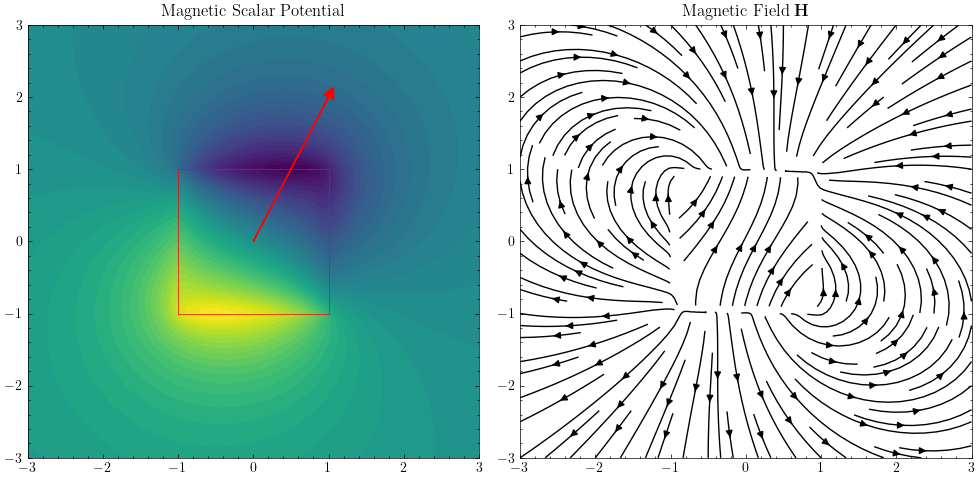

In [20]:
x, y, z = jnp.meshgrid(row, row, jnp.linspace(0, 0, 1))
r = jnp.stack([x, y, z], axis=-1).reshape(-1, 3)

potential = jax.vmap(_exterior, in_axes=(None, 0, None))(m, r, lims)
field = -jax.vmap(jax.grad(_exterior, argnums=1), in_axes=(None, 0, None))(m, r, lims)

potential = potential.reshape(res, res)
field = field.reshape(res, res, 3)

import matplotlib.patches as patches

with plt.style.context("science"):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Subplot 1: Contour plot of potential
    ax1.contourf(x[..., 0], y[..., 0], potential, levels=50, cmap="viridis")
    ax1.set_title("Magnetic Scalar Potential")

    # Draw red square
    square = patches.Rectangle(
        (-1, -1), 2, 2, linewidth=0.5, edgecolor="r", facecolor="none"
    )
    ax1.add_patch(square)
    ax1.arrow(0, 0, m[0], m[1], head_width=0.15, head_length=0.15, fc="r", ec="r")

    # Subplot 2: Streamplot of field
    nx = np.array(x[..., 0])
    ny = np.array(y[..., 0])
    Bx = np.array(field[..., 0])
    By = np.array(field[..., 1])
    ax2.streamplot(nx, ny, Bx, By, color="k", density=1.25)
    ax2.set_title("Magnetic Field $\mathbf{H}$")

    plt.tight_layout()
    plt.show()

## 3D plotting

In [20]:
lim = 10
res = 50
row = jnp.linspace(-lim, lim, res)

x, y, z = jnp.meshgrid(row, row, row, indexing="ij")
r = jnp.stack([x, y, z], axis=-1).reshape(-1, 3)

potential = jax.vmap(_exterior, in_axes=(None, 0, None))(m, r, lims)
field = -jax.vmap(jax.grad(_exterior, argnums=1), in_axes=(None, 0, None))(m, r, lims)
# field = field.reshape(res, res, res, 3)

x, y, z = np.array(x), np.array(y), np.array(z)
potential = np.array(potential)
field = np.array(field)

In [22]:
# Create a PyVista mesh
grid = pv.StructuredGrid(x, y, z)
grid["vectors"] = field.reshape(-1, 3)
glyphs = grid.glyph(orient="vectors", factor=0.1, geom=pv.Arrow())
magnet = pv.Box()

plotter = pv.Plotter(notebook=False)
plotter.add_mesh(glyphs, show_scalar_bar=False, lighting=True, cmap="viridis")
plotter.add_mesh(magnet, color="white", opacity=0.5)
plotter.show()